In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv,det,eig
import cv2
import math

In [4]:
#Generate the face database

In [5]:
train_imgs=[]
test_imgs=[]
train_label=[]
test_label=[]
for i in range(1,41):
    for j in range(1,11):
        img=cv2.imread("face_data\\s"+str(i)+"\\"+str(j)+".pgm",0)
        img=np.ravel(img)
        if(j<7): 
            train_imgs.append(img)
            train_label.append(i)
        else:
            test_imgs.append(img)
            test_label.append(i)

In [6]:
# Mean Calculation of training images and test images

In [18]:
train_data=np.array(train_imgs)
train_mean=np.mean(train_imgs, axis = 0)
print(train_data.shape)
print(train_mean.shape)
test_data=np.array(test_imgs)
test_mean=np.mean(test_imgs,axis=0)

(240, 10304)
(10304,)


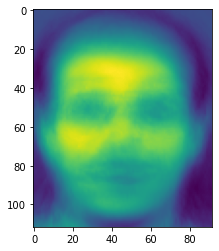

In [8]:
mean_face=train_mean.reshape(112,92) # mean face
plt.imshow(mean_face)

In [9]:
#mean zero face data

In [10]:
mean_aligned_train_faces=(train_imgs-train_mean).transpose()
print("Shape of mean_aligned_faces= ",mean_aligned_train_faces.shape)

Shape of mean_aligned_faces=  (10304, 240)


In [19]:
#Calculating Co-Variance of the Mean aligned faces

(10304, 10304)


In [12]:
cov_train=(np.dot(np.transpose(mean_aligned_train_faces),mean_aligned_train_faces))/len(mean_aligned_train_faces[0])

In [13]:
print("Shape of covariance = ",cov_train.shape)

Shape of covariance =  (240, 240)


In [21]:
# finding eigenvalue and eigenvector decomposition
eigen_val,eigen_vector=eig(cov_train)
print(eigen_vector[:200].shape)

(200, 240)


In [15]:
#sorting eigen_values and eigen_vectors in descending order
eigen_val,eigen_vector = (list(t) for t in zip(*sorted(zip(eigen_val,eigen_vector),reverse=True)))

In [16]:
#selecting best features from 5 to 200 and calculating accuracy
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
x=[]
for k in range(5,200):
    x.append(k)
    k_faces=eigen_vector[:k] 
    k_faces=np.array(k_faces).T 
    eigen_faces=np.dot(k_faces.T,mean_aligned_train_faces.T)#Generating Eigenfaces 
    signature=np.dot(eigen_faces,mean_aligned_train_faces) #Signature of Each Face 
    test_data=(test_imgs-test_mean).transpose() 
    test_sample=np.dot(eigen_faces,test_data).T #Project this mean aligned face to eigenfaces
    knn = KNeighborsClassifier(n_neighbors=1) #classification using KNN with neighbors 1
    knn.fit(signature.T,train_label)
    y_pred=knn.predict(test_sample)
    count=0
    for i in range(0,len(y_pred)):
        if(y_pred[i]==test_label[i]):
            count+=1
    accuracy.append(count/len(y_pred))

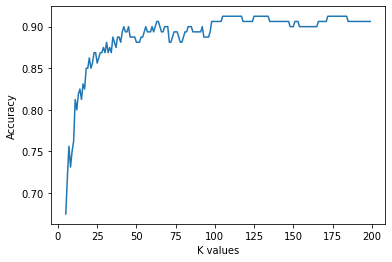

In [17]:
plt.plot(x,accuracy)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()